# LaViSE Experiments results

In [49]:
import matplotlib.pyplot as plt
import glob
%matplotlib inline

### 1. Download the datasets if you haven't already and preprocess it.

In [4]:
# Download MS COCO and pre-process the data
! sh setup_coco.sh

Extracting the images...
Extracting the annotations...
Preprocessing the dataset...
-e 
>>> COCO setup script finished <<<


In [5]:
# Download VG and pre-process the data
! sh setup_vg.sh

Extracting the images...
Extracting the annotations...
Creating the dataset...
-e 
>>> VG setup script finished <<<


### 2. Download the pretrained models if you haven't already.

#### ResNet-18 - VG

In [44]:
path = 'outputs/resnet18-layer4-imagenet_vg/'
!mkdir $path
!gdown 1nM00Zt1q8BbmvARf3uxb8IJK0UZdSc0D -O $path/ckpt_best.pth.tar

#### ResNet-50 - VG

In [42]:
path = 'outputs/resnet50-layer4-imagenet-vg'
!mkdir $path
!gdown 1X5DCCEk7haLCC7zjMu1bgHmO1zhskHyM -O $path/ckpt_best.pth.tar

#### ResNet-18 - MS COCO

In [45]:
path = 'outputs/resnet18-layer4-imagenet-coco'
!mkdir $path
!gdown 1TmVwVePrpnOA1dEMXt0TMuqornIpUHIV -O $path/ckpt_best.pth.tar

### AlexNet - MS COCO

In [46]:
path = 'outputs/alexnet-layer4-imagenet-coco'
!mkdir $path
!gdown X -O $path/ckpt_best.pth.tar

## 3. Evaluate the models

### 3.1. ResNet-18 - VG

In [27]:
!python3 infer_filter.py --model resnet18 --layer-target layer4 --layer-classifier fc --refer vg --path-model outputs/resnet18-layer4-imagenet-vg/ckpt_best.pth.tar --s 20

### 3.2 ResNet-50 - VG

In [ ]:
!python3 infer_filter.py --model resnet50 --layer-target layer4 --layer-classifier fc --refer vg --path-model outputs/resnet18-layer4-imagenet_vg/ckpt_best.pth.tar --s 20

### 3.3. ResNet-18 - MS COCO

In [69]:
!python3 infer_filter.py --model resnet18 --layer-target layer4 --layer-classifier fc --refer coco --path-model outputs/resnet18-layer4-imagenet-coco/ckpt_best.pth.tar --s 20

args=Namespace(batch_size=1, dir_data='./data', dir_save='./outputs', layer_classifier='fc', layer_target='layer4', method='projection', model='resnet18', name=None, num_heatmaps=5, num_tokens=10, num_workers=8, p=25, path_model='outputs/resnet18-layer4-imagenet-coco/ckpt_best.pth.tar', random=False, refer='coco', s=20, seed=42, threshold_iou=0.04, u=[0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144, 156, 168, 180, 192, 204, 216, 228, 240, 252], wandb=False, weigh_s_by_relevance=False, word_embedding_dim=300)
Loading model from 'outputs/resnet18-layer4-imagenet-coco/ckpt_best.pth.tar'... Done.
loading annotations into memory...
Done (t=14.60s)
creating index...
index created!
loading annotations into memory...
Done (t=0.48s)
creating index...
index created!

-----------------------[ Model was loaded successfully! ]----------------------

Found precomputed max activations in './outputs/resnet18-layer4-imagenet-coco/max_acts/p-25_u-0.pt'. Loading... Done.
Found precomputed max activ

### 3.4. AlexNet - MS COCO

In [ ]:
!python3 infer_filter.py --model alexnet --layer-target layer4 --layer-classifier fc --refer coco --path-model outputs/alexnet-layer4-imagenet-coco/ckpt_best.pth.tar --s 20

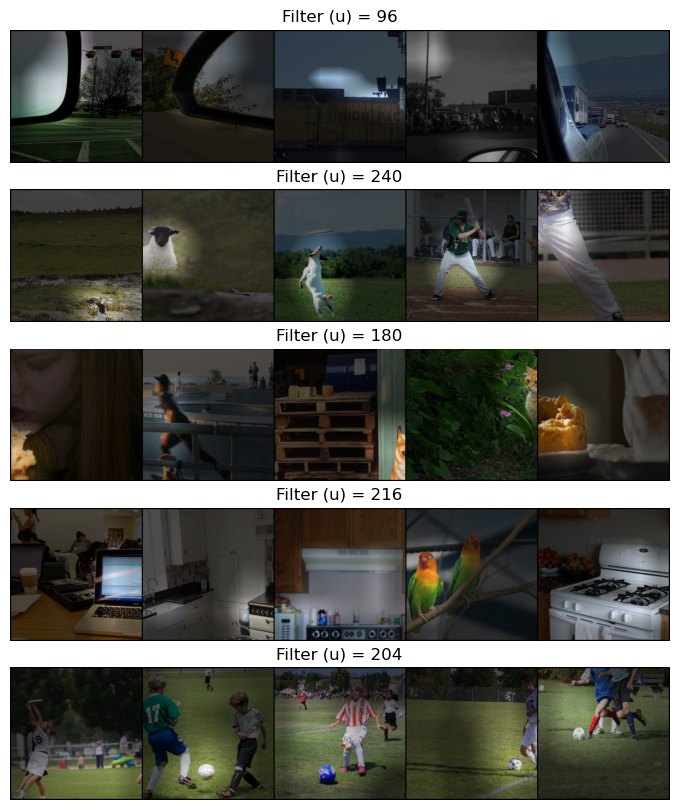

In [67]:
def plot_samples(path: str, n = 5) -> None:
    """Plots the first n heatmap samples vertically from the path directory.
    
    Args:
        path (str): Path to the heatmaps, which is a folder of png files.
        n (int): Number of samples to plot.
    """
    files = glob.glob(path + '*.png')
    fig, ax = plt.subplots(n, 1, figsize=(10, 10))
    for i, f in enumerate(files[:n]):
        ax[i].imshow(plt.imread(f))
        ax[i].axis('off')
        u = f.split('-')[-1].split('.')[0]
        ax[i].set_title(f"Filter (u) = {u}")
    plt.show()
    
plot_samples("outputs/resnet18-layer4-imagenet-coco/heatmaps/")